In [29]:
from ecell4 import *
from ecell4.extra import ensemble
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

simrun=1000
duration = 1000
#rm = 0.005
D=0.1
Nas = 10
nproc=None
L=1#cbrt(10)
k0= 0.1
method='sge'

for rm in [0.05]:
    def write(name,obs):
        try:
            f=open(name,'w')
            data = np.array(obs.data()).T
            np.savetxt(name,np.column_stack([data[0],data[1]]),delimiter=',',fmt='%s')
            f.close()        
            print('saving into',name)        
            e=open(name+'_err','w')        
            err = np.array(obs.error()).T        
            np.savetxt(name+'_err',np.column_stack([err[0],err[1]]),delimiter=',',fmt='%s')
            e.close()
            print('saving into',name+'_err')
        except AttributeError:
            print('no error')



    def singlerun(solver='ode',intrinsic=False,simrun=1):   
        print(solver)
        V = L**3 
        M = max(int(min(cbrt(Nas), L / (2 * rm))), 3)
        if solver=='spa':
            solver=("spatiocyte",rm)
            V=spatiocyte.SpatiocyteWorld.calculate_volume(Real3(L,L,L),rm)
        elif solver=='egfrd':
            solver = ('egfrd', Integer3(M, M, M)) 

        kon=k0/V        
        keff = kon*V*V/Nas
        kd = 4*np.pi*rm*2*D*2
        ka = keff*kd/(kd-keff)
        assert(ka>0)
        with species_attributes():
            A | {'D': D, 'radius':rm}
            B | {'D': D, 'radius':rm}

        with reaction_rules():
            ~A > A | kon
            A + B >B | (ka if intrinsic else keff)
        m = get_model()

        print('av={:.3},intrinsic={}'.format(float(V),intrinsic))
        print('kon={:.3},koff={:.3},kd={:.3},keff={:.3},kfactor={:.3}'.format(kon,(ka if intrinsic else keff),kd,keff,ka/kd))
        if simrun >1    :
            obs=ensemble.ensemble_simulations(duration,n=simrun, y0={'B':1},model=m, solver=solver,volume=ones()*L,species_list=["A"],return_type='observer',nproc=nproc,method=method)#,return_type="observer")
        else:
            obs=run_simulation(duration,model=m,y0={'B':1},return_type='observer',species_list=['A'],solver=solver,volume=ones()*L)
        return obs

    obs1=singlerun('ode',False,1)
    obs2=singlerun('spa',True,simrun)
    #obs3=singlerun('egfrd',True,simrun)
    write('/home/chew/outputdata/sturrock_bd_ode_rm{:.3}_Nas10'.format(rm),obs1)
    write('/home/chew/outputdata/sturrock_bd_spa_rm{:.3}_Nas10'.format(rm),obs2)
    #write('/home/chew/outputdata/sturrock_bd_egfrd_rm{:.3}_Nas10'.format(rm),obs3)

ode
av=1.0,intrinsic=False
kon=0.1,koff=0.01,kd=0.251,keff=0.01,kfactor=0.0414
spa
av=1.66,intrinsic=True
kon=0.0601,koff=0.0178,kd=0.251,keff=0.0166,kfactor=0.0709


DEBUG:sge:Your job-array 944775.1-1000:1 ("sge-0exwj9tz.job") has been submitted
DEBUG:sge:job-ID  prior   name       user         state submit/start at     queue                          slots ja-task-ID 
DEBUG:sge:-----------------------------------------------------------------------------------------------------------------
DEBUG:sge: 944775 0.00000 sge-0exwj9 chew         qw    10/06/2017 19:32:35                                    1 1-1000:1
DEBUG:sge:
INFO:sge:Job 944775 must be queued, running or being transferred
INFO:sge:Waiting for jobids [944775] to finish
DEBUG:sge:job-ID  prior   name       user         state submit/start at     queue                          slots ja-task-ID 
DEBUG:sge:-----------------------------------------------------------------------------------------------------------------
DEBUG:sge: 944775 0.00000 sge-0exwj9 chew         qw    10/06/2017 19:32:35                                    1 1-1000:1
DEBUG:sge:
INFO:sge:Job 944775 must be queued, running

DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc07                        1 440
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc21                        1 441
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc04                        1 442
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc03                        1 443
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc12                        1 444
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc01                        1 445
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc13                        1 446
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc10                        1 447
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/20

DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc28                        1 511
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc27                        1 512
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc14                        1 513
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc20                        1 514
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc06                        1 515
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc21                        1 516
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc04                        1 517
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc03                        1 518
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/20

DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc26                        1 582
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc15                        1 583
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc25                        1 584
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc06                        1 585
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc20                        1 586
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc14                        1 587
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc27                        1 588
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc28                        1 589
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/20

DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc25                        1 653
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc07                        1 654
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc28                        1 655
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc27                        1 656
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc14                        1 657
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc20                        1 658
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc06                        1 659
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc21                        1 660
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/20

DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc20                        1 724
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc14                        1 725
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc27                        1 726
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc28                        1 727
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc07                        1 728
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc21                        1 729
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc03                        1 730
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/2017 19:33:05 all.q@ibc12                        1 731
DEBUG:sge: 944775 0.50000 sge-0exwj9 chew         t     10/06/20

saving into /home/chew/outputdata/sturrock_bd_ode_rm0.05_Nas10
no error
saving into /home/chew/outputdata/sturrock_bd_spa_rm0.05_Nas10
saving into /home/chew/outputdata/sturrock_bd_spa_rm0.05_Nas10_err


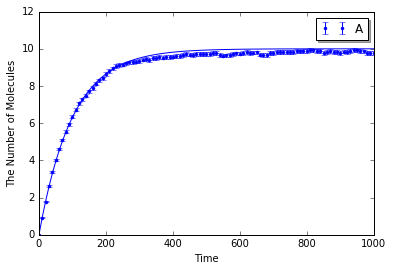

In [30]:
viz.plot_number_observer(obs2,'r.',obs1,'k-')

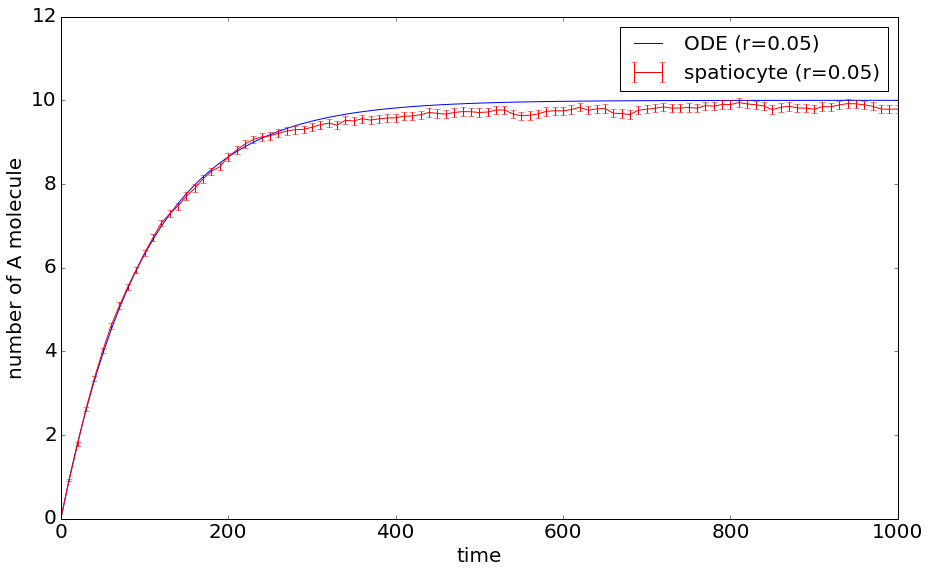

In [31]:
fig=plt.figure()
data1 = np.array(obs1.data()).T
plt.plot(data1[0], data1[1],'-', label='ODE (r={})'.format(rm))
#plt.errorbar(data1[0], data1[1], yerr=err1[1], fmt='r-', label='ODE (r={})'.format(rm))
data2 = np.array(obs2.data()).T
err2 = np.array(obs2.error()).T
#plt.plot(data2[0], data2[1],'.', label='spa (r={})'.format(rm))
plt.errorbar(data2[0], data2[1], yerr=err2[1], fmt='r-', label='spatiocyte (r={})'.format(rm))
data3 = np.array(obs3.data()).T
err3 = np.array(obs3.error()).T
#plt.plot(data3[0], data3[1],'.', label='egfrd (r={})'.format(rm))
plt.legend(loc='best',fontsize=20)
fig.set_size_inches(15, 9)
plt.tick_params(labelsize=20)
s=20
plt.xlabel('time',fontsize=s)
plt.ylabel('number of A molecule',fontsize=s)
#plt.title('L={},D={},kd={:3},keff={:3},ka_Spa={:3},ka_eGFRD={:3}'.format(L,D,0.126,0.02,0.025,0.024),fontsize=s)
#plt.title('Spa:kon=0.0964,koff=0.0177,kd=0.0251,keff=0.0104,kfactor=0.703,eGFRD:kon=0.1,koff=0.0166,keff=0.01',fontsize=s)
#plt.savefig('/home/chew/ecellwork/figure/sturrock_birth_death_rm0.005_Nas10.png')

In [ ]:
rm=0.005
kon=0.0964,koff=0.119,kd=0.0251,keff=0.0207,kfactor=4.73
kon=0.1,koff=0.0979,kd=0.0251,keff=0.02,kfactor=3.9
rm=0.05
kon=0.0601,koff=0.0383,kd=0.251,keff=0.0333,kfactor=0.153
kon=0.1,koff=0.0217,kd=0.251,keff=0.02,kfactor=0.0865

0.005
spa mean 4.968198
egfrd mean 4.88968


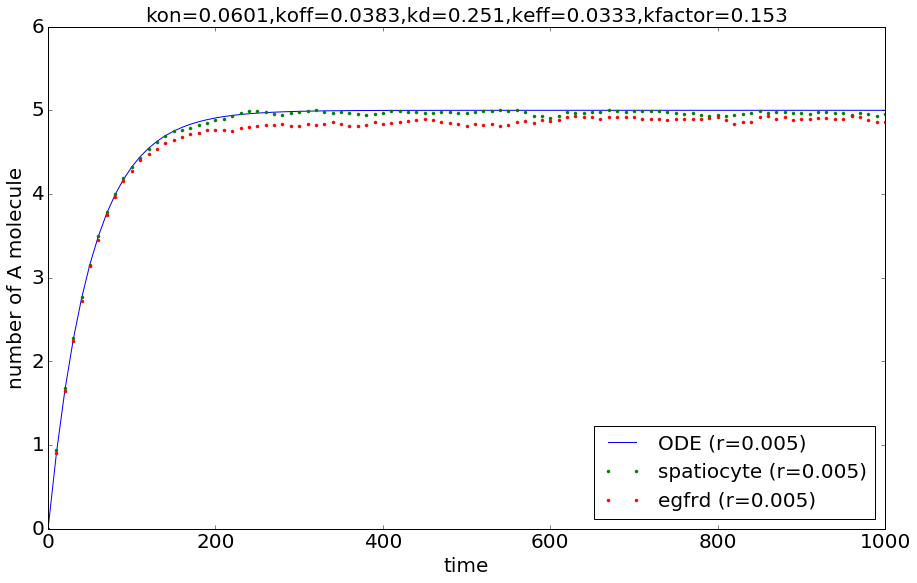

In [3]:
for rm in [0.005]:
    dat1=np.genfromtxt('/home/chew/outputdata/sturrock_bd_ode_rm{}'.format(rm),delimiter=',',dtype='str')
    dat2=np.genfromtxt('/home/chew/outputdata/sturrock_bd_spa_rm{}'.format(rm),delimiter=',',dtype='str')
    dat3=np.genfromtxt('/home/chew/outputdata/sturrock_bd_egfrd_rm{}'.format(rm),delimiter=',',dtype='str')
    fig=plt.figure()
    plt.plot(dat1[:,0],dat1[:,1], label='ODE (r={})'.format(rm))
    plt.plot(dat2[:,0],dat2[:,1],'.', label='spatiocyte (r={})'.format(rm))
    plt.plot(dat3[:,0],dat3[:,1],'.', label='egfrd (r={})'.format(rm))
    print(rm)
    print('spa mean',np.mean([float(i) for i in dat2[:,1][-50:]]))
    print('egfrd mean',np.mean([float(i) for i in dat3[:,1][-50:]]))
    plt.tick_params(labelsize=20)
    s=20
    plt.legend(loc='best',fontsize=20)
    plt.xlabel('time',fontsize=s)
    if rm==0.005:
        plt.title('spa:kon=0.0964,koff=0.119,kd=0.0251,keff=0.0207,kfactor=4.73 \n egfrdkon=0.1,koff=0.0979,kd=0.0251,keff=0.02,kfactor=3.9',fontsize=s)
    elif rm==0.05:
        plt.title('kon=0.0601,koff=0.0383,kd=0.251,keff=0.0333,kfactor=0.153 \n kon=0.1,koff=0.0217,kd=0.251,keff=0.02,kfactor=0.0865',fontsize=s)
    plt.ylabel('number of A molecule',fontsize=s)
    fig.set_size_inches(15, 9)
    plt.savefig('/home/chew/ecellwork/figure/sturrock_birth_death_rm{}_Nas5.png'.format(rm))

In [4]:
d2=np.genfromtxt('/home/chew/outputdata/sturrock_bd_spa_rm0.005_run2',delimiter=',',dtype='str')
d1=np.genfromtxt('/home/chew/outputdata/sturrock_bd_spa_rm0.005',delimiter=',',dtype='str')

In [21]:
dat3=np.array([0.5*(float(x)+float(y)) for x,y in zip(d2[:,1],d1[:,1])])

In [14]:
t=[float(x) for x in d1[:,0]]
print(t)

[0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 110.0, 120.0, 130.0, 140.0, 150.0, 160.0, 170.0, 180.0, 190.0, 200.0, 210.0, 220.0, 230.0, 240.0, 250.0, 260.0, 270.0, 280.0, 290.0, 300.0, 310.0, 320.0, 330.0, 340.0, 350.0, 360.0, 370.0, 380.0, 390.0, 400.0, 410.0, 420.0, 430.0, 440.0, 450.0, 460.0, 470.0, 480.0, 490.0, 500.0, 510.0, 520.0, 530.0, 540.0, 550.0, 560.0, 570.0, 580.0, 590.0, 600.0, 610.0, 620.0, 630.0, 640.0, 650.0, 660.0, 670.0, 680.0, 690.0, 700.0, 710.0, 720.0, 730.0, 740.0, 750.0, 760.0, 770.0, 780.0, 790.0, 800.0, 810.0, 820.0, 830.0, 840.0, 850.0, 860.0, 870.0, 880.0, 890.0, 900.0, 910.0, 920.0, 930.0, 940.0, 950.0, 960.0, 970.0, 980.0, 990.0, 1000.0]


In [23]:
name='/home/chew/outputdata/sturrock_bd_spa_rm0.005_run3'
f=open(name,'w')
np.savetxt(name,np.column_stack([t,dat3]),delimiter=',',fmt='%s')
f.close()

In [22]:
dat3

array([ 0.    ,  0.9462,  1.677 ,  2.2796,  2.7726,  3.155 ,  3.4933,
        3.7861,  4.0001,  4.1869,  4.3229,  4.4328,  4.54  ,  4.6258,
        4.693 ,  4.7562,  4.7676,  4.7872,  4.8205,  4.8468,  4.8832,
        4.8917,  4.9319,  4.9652,  4.99  ,  4.9925,  4.9789,  4.9602,
        4.9483,  4.9734,  4.9849,  4.9914,  4.9991,  4.9855,  4.9665,
        4.9767,  4.9646,  4.9542,  4.9446,  4.9555,  4.9657,  4.9906,
        4.9942,  4.981 ,  4.9854,  4.9673,  4.9728,  4.9757,  4.9757,
        4.9687,  4.9727,  4.9843,  4.9902,  4.9894,  4.9998,  4.9872,
        5.0014,  4.9843,  4.9343,  4.9355,  4.9031,  4.9378,  4.9753,
        4.9669,  4.9693,  4.9843,  4.9827,  4.9997,  4.9858,  4.9845,
        4.9922,  4.9914,  4.9905,  4.986 ,  4.9816,  4.9658,  4.9536,
        4.9644,  4.9471,  4.9276,  4.9381,  4.9297,  4.9415,  4.9606,
        4.9706,  4.9928,  4.969 ,  4.975 ,  4.9822,  4.973 ,  4.971 ,
        4.961 ,  4.978 ,  4.9772,  4.9723,  4.9636,  4.9447,  4.967 ,
        4.9538,  4.9